<a href="https://colab.research.google.com/github/bittusharma128/RRS/blob/main/Location_based_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Location-Based Recommendations
# Recommendation systems are widely utilized in different applications for predicting the preference or rating of a user 
# in a product or service. Most likely you have come across or interacted with some type of recommender systems in the past 
# few minutes or hours in your online presence.
# These Recommender systems can be of different types and the most prominent ones include Content-based filtering and Collaborative
# filtering. In this article, we will study location-based recommendations, where we specifically focus on geographic locations to render 
# more relevant recommendations utilizing the location of the users.

# To illustrate the crucial aspects of location-based recommenders we will perform a simple Location-based recommendation using the
#  K-Means algorithm with Zomato Dataset from Kaggle.

In [ ]:

!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install folium 
!pip install plotly_express


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,807 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../python3-numpy_

In [ ]:
import pandas as pd 
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv('zomato.csv',encoding="latin-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.shape

(9551, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Exploratory Data Analaysis (EDA)

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
df['Cuisines'].mode()

0    North Indian
dtype: object

In [ ]:
df['Cuisines'].fillna(value='North Indian'[0],inplace=True)

In [ ]:
df.drop('Rating text',axis=1,inplace = True)

In [ ]:
df.drop('Is delivering now',axis=1,inplace = True)

In [ ]:
df.drop('Rating color',axis=1,inplace = True)

In [ ]:
df.drop('Switch to order menu',axis=1,inplace = True)

In [ ]:
df.drop('Currency',axis=1,inplace = True)


In [ ]:
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,3,4.8,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Yes,No,3,4.5,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,No,No,4,4.9,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Yes,No,4,4.8,229


In [ ]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

In [ ]:
zomato_india=df[df['Country Code']==1]
zomato_india

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,78.011544,27.161661,"North Indian, Mughlai",850,No,No,3,3.9,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,0.000000,0.000000,"North Indian, Mughlai",700,No,No,2,3.5,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,78.011608,27.160832,North Indian,500,No,No,2,3.6,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,77.998092,27.195928,Rajasthani,400,No,No,2,4.0,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,No,No,3,4.2,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,No,No,2,3.6,193
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,0.000000,0.000000,"Cafe, North Indian, Chinese",400,No,No,2,3.7,85
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,83.315281,17.719539,"Burger, Pizza, Biryani",600,No,No,2,4.3,172
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay",83.336840,17.721182,"American, North Indian, Thai, Continental",1500,No,No,4,3.8,74


In [ ]:
zomato_delhi=zomato_india[zomato_india['City']=='New Delhi']
zomato_delhi

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
2560,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,0.000000,0.000000,Cuisine Varies,500,No,No,2,0.0,2
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,77.196923,28.535382,Fast Food,350,No,Yes,1,3.2,46
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",1500,Yes,Yes,3,3.4,45
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,77.198033,28.537547,"South Indian, North Indian",500,No,No,2,2.6,11
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",500,No,Yes,2,3.4,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,18445274,Motu N Patlu,1,New Delhi,"Batla House Chowk, Near Jamia Milia Islamia, O...",Zakir Nagar,77.285065,28.566246,"Lebanese, North Indian, Fast Food",250,No,No,1,0.0,0
8029,18168147,S.K. Fast Food,1,New Delhi,"161/32, Shop 3 Joga Bai, Main Road, Zakir Naga...",Zakir Nagar,77.283827,28.566189,Chinese,350,No,No,1,0.0,0
8030,18429375,Sufiyan Restaurant,1,New Delhi,"57/12, Main Road, Zakir Nagar, New Delhi",Zakir Nagar,77.279779,28.567321,Mughlai,250,No,No,1,0.0,0
8031,310479,The Relax Point,1,New Delhi,"92/17, Zakir Nagar, New Delhi",Zakir Nagar,77.278543,28.566849,North Indian,250,No,No,1,0.0,1


In [ ]:
zomato_india['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Amritsar          21
Guwahati          21
Ahmedabad         21
Bhubaneshwar      21
Lucknow           21
Mysore            20
Agra              20
Vadodara          20
Vizag             20
Patna             20
Varanasi          20
Goa               20
Bhopal            20
Dehradun          20
Nagpur            20
Chennai           20
Coimbatore        20
Aurangabad        20
Kolkata           20
Allahabad         20
Bangalore         20
Kochi             20
Indore            20
Kanpur            20
Puducherry        20
Mangalore         20
Ranchi            20
Ludhiana          20
Pune              20
Surat             20
Jaipur            20
Nashik            20
Mumbai            20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

In [ ]:
zomato_delhi.shape

(5473, 15)

In [ ]:
df_delhi = zomato_delhi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



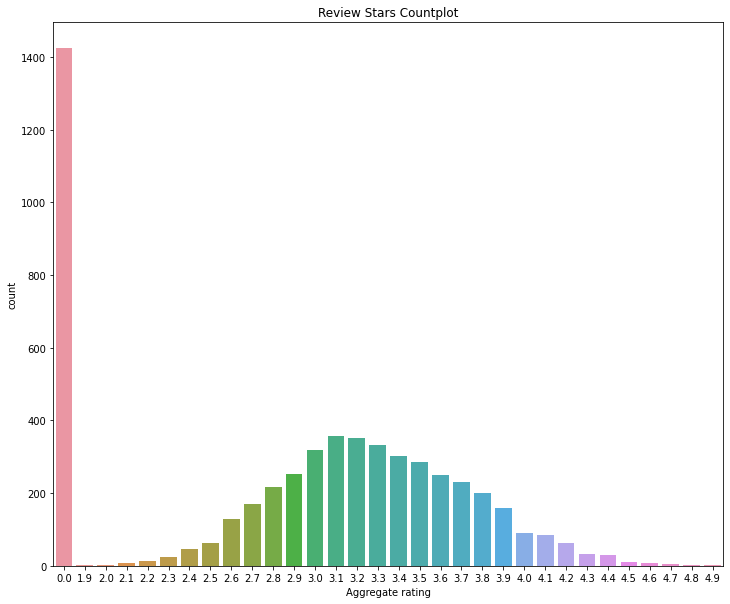

In [ ]:

fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(df_delhi['Aggregate rating'], ax=ax)
plt.title('Review Stars Countplot')
# plt.savefig('stars.png')
plt.show()

In [ ]:
top_restaurants = df_delhi.sort_values(by=['Votes', 'Aggregate rating'], ascending=False)[:20]
top_restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
3994,308322,Hauz Khas Social,1,New Delhi,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,77.194471,28.554285,"Continental, American, Asian, North Indian",1600,Yes,Yes,3,4.3,7931
3110,900,Saravana Bhavan,1,New Delhi,"P-13, Connaught Circus, Connaught Place, New D...",Connaught Place,77.216310,28.632358,South Indian,500,No,Yes,2,4.3,5172
4638,1614,Big Chill,1,New Delhi,"68-A, Khan Market, New Delhi",Khan Market,77.227447,28.600624,"Italian, Continental, European, Cafe",1500,No,No,3,4.5,4986
3085,301605,Warehouse Cafe,1,New Delhi,"D -19/20, 1st Floor, Inner Circle, Connaught P...",Connaught Place,77.220863,28.633844,"American, Continental, Italian, North Indian, ...",1500,No,No,3,3.7,4914
4178,463,Karim's,1,New Delhi,"16, Gali Kababian, Jama Masjid, New Delhi",Jama Masjid,77.233630,28.649393,"Mughlai, North Indian",800,No,No,2,4.0,4689


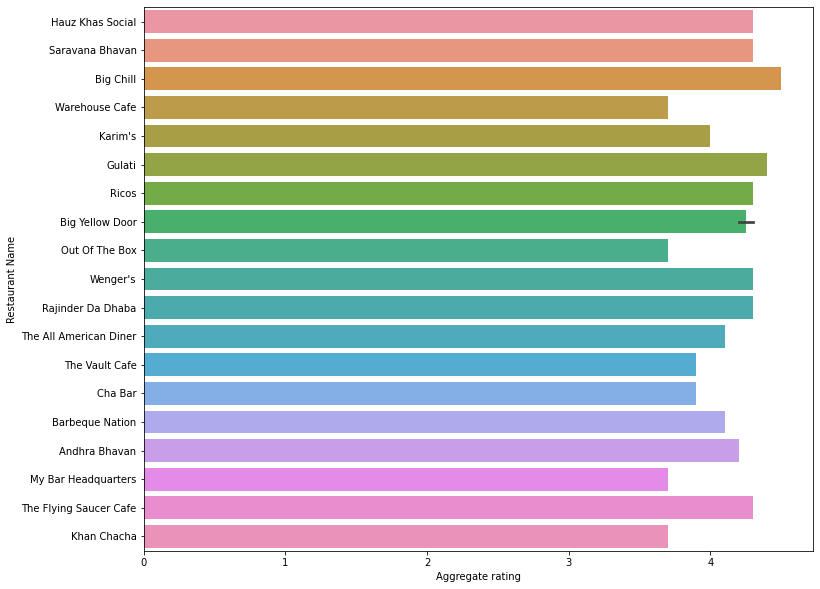

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'Aggregate rating', y = 'Restaurant Name', data=top_restaurants, ax= ax);
plt.savefig('top20_restaurants.png')
plt.show()

In [ ]:
px.set_mapbox_access_token("pk.eyJ1IjoiYml0dHUxMjgiLCJhIjoiY2t0Y2VsdG95MjR4dDJvcWxsYzVqcjR2OSJ9.wrR1yHeSnanMJnY-38oLfA")
#configure_plotly_browser_state()
px.scatter_mapbox(zomato_india, lat="Latitude", lon="Longitude", color="Aggregate rating", size='Votes' ,
                   size_max=30, zoom=3, width=1200, height=800)

In [ ]:

px.scatter_mapbox(df_delhi, lat="Latitude", lon="Longitude", color="Aggregate rating", size='Votes' ,
                   size_max=15, zoom=10, width=1200, height=800)

## K-Means Clustering

### Determing the number of clusters (K)

In [ ]:
# Elbow method to determine the number of K in Kmeans Clustering
coords = df_delhi[['Longitude','Latitude']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)



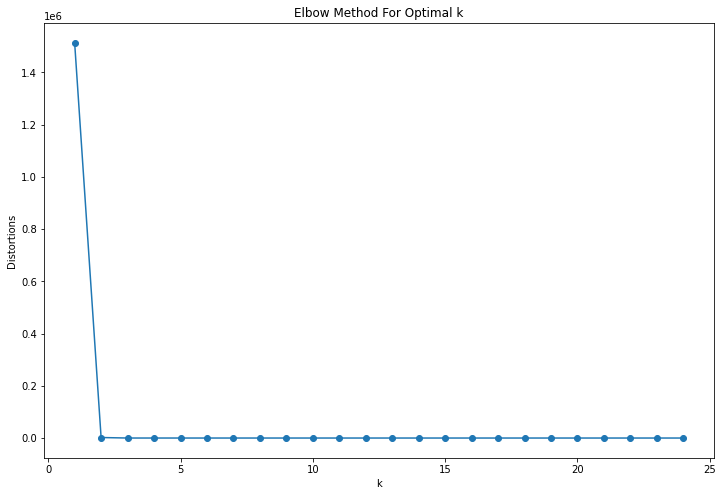

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
# plt.savefig('elbow.png')
plt.show()

Silhoute method


In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

In [ ]:
sil

[0.998436475008409,
 0.9973597765717733,
 0.4514648886236963,
 0.4728876935416164,
 0.4893294095062714,
 0.4350479064120912,
 0.45484386415994726,
 0.44871694043413396,
 0.472642450013589,
 0.4455157094156886,
 0.4525766296537324,
 0.4489845210776424,
 0.46419151770655503,
 0.46450543081963236,
 0.44617603766405467,
 0.4784949774994049,
 0.46447753929818925,
 0.4516235257854179,
 0.4822582082562359,
 0.4920590659810225,
 0.47837957323191904,
 0.4693971559498751,
 0.484936031863141,
 0.4848217236512902,
 0.4707658353236448,
 0.49993046233945376,
 0.4843504648677721,
 0.46788494487920174,
 0.49066195084123654,
 0.4726694553396576,
 0.49027686836026396,
 0.47730135822972464,
 0.4822758160193944,
 0.4720945350708286,
 0.4818281782292562,
 0.4961431489442492,
 0.49245036586280777,
 0.4723771382398445,
 0.4929973846920825,
 0.49616081697454795,
 0.4871588110136968,
 0.5010323296736605,
 0.4961241283446915,
 0.4937893617237206,
 0.505779258101243,
 0.49367517037200087,
 0.5013513273706665,
 0

### K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=7, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 7", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

k = 7  silhouette_score  0.4495713570483958


In [ ]:
df_delhi['cluster'] = kmeans.predict(df_delhi[['Longitude','Latitude']])
df_delhi.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,cluster
2560,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,0.000000,0.000000,Cuisine Varies,500,No,No,2,0.0,2,1
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,77.196923,28.535382,Fast Food,350,No,Yes,1,3.2,46,3
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,77.197475,28.535493,"North Indian, Seafood, Continental",1500,Yes,Yes,3,3.4,45,3
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,77.198033,28.537547,"South Indian, North Indian",500,No,No,2,2.6,11,3
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,77.196924,28.535523,"South Indian, North Indian, Chinese",500,No,Yes,2,3.4,238,3
2565,18414465,Mezbaan Grills,1,New Delhi,"A- 96, Shri Aurbindo Marg, Adchini, New Delhi",Adchini,77.198122,28.538134,Mughlai,400,No,No,1,3.1,8,3
2566,304243,Say Cheese,1,New Delhi,"88/3, Adchini, New Delhi",Adchini,77.198159,28.537448,Fast Food,400,No,Yes,1,2.7,64,3
2567,3554,Southy,1,New Delhi,"88/4, Adchini, New Delhi",Adchini,77.197950,28.537474,South Indian,450,No,Yes,1,2.6,113,3
2568,18369872,Monosoz,1,New Delhi,"Sri Aurobindo Marg, Adchini, New Delhi",Adchini,77.198042,28.538394,Pizza,300,No,Yes,1,3.7,66,3
2569,948,Waves,1,New Delhi,"A-4, Sarvodaya Enclave, Adchini, New Delhi",Adchini,77.198808,28.538666,"North Indian, Chinese",1500,Yes,Yes,3,3.5,141,3


In [ ]:
px.scatter_mapbox(df_delhi, lat="Latitude", lon="Longitude", color="cluster", size='Votes', 
                  hover_data= ['Restaurant Name', 'Latitude', 'Longitude','Cuisines','Aggregate rating'], zoom=10, width=1200, height=800)

## Location-Based Recommendation

In [ ]:
def recommend_restaurants(df, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)
   
    # Get the best restaurant in this cluster
    return  df[df['cluster']==cluster].iloc[0:7][['Restaurant Name', 'Latitude','Longitude','Aggregate rating'	]]
   

In [ ]:
recommend_restaurants(top_restaurants_delhi,77.194471,  28.554285)

3


,Restaurant Name,Latitude,Longitude,Aggregate rating
3994,Hauz Khas Social,28.554285,77.194471,4.3
3992,Out Of The Box,28.554177,77.194482,3.7
6848,Rajinder Da Dhaba,28.565402,77.199241,4.3
7033,Big Yellow Door,28.587912,77.167524,4.2
4087,Bukhara - ITC Maurya,28.597466,77.173724,4.4
3438,Big Chill,28.528176,77.217796,4.4
3986,Imperfecto,28.554686,77.195143,3.7


In [ ]:
recommend_restaurants(top_restaurants_delhi,76.233630, 28.354545) 

5


,Restaurant Name,Latitude,Longitude,Aggregate rating
6712,Pirates of Grill,28.647497,77.118207,4.1
6701,AMPM Cafí© & Bar,28.647774,77.120122,4.1
6659,The California Boulevard,28.647716,77.120035,4.6
6709,Lights Camera Action - Air Bar,28.647793,77.119833,4.4
7469,Punjab Grill,28.642216,77.106503,4.3
5990,Hinglish - Cafe Beach Bar,28.642449,77.106846,3.7
6658,Qubitos - The Terrace Cafe,28.647133,77.117701,4.5


In [ ]:
top_restaurants_delhi = df_delhi.sort_values(by=['Votes', 'Aggregate rating'], ascending=False)
top_restaurants_delhi

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,cluster
3994,308322,Hauz Khas Social,1,New Delhi,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,77.194471,28.554285,"Continental, American, Asian, North Indian",1600,Yes,Yes,3,4.3,7931,3
3110,900,Saravana Bhavan,1,New Delhi,"P-13, Connaught Circus, Connaught Place, New D...",Connaught Place,77.216310,28.632358,South Indian,500,No,Yes,2,4.3,5172,0
4638,1614,Big Chill,1,New Delhi,"68-A, Khan Market, New Delhi",Khan Market,77.227447,28.600624,"Italian, Continental, European, Cafe",1500,No,No,3,4.5,4986,6
3085,301605,Warehouse Cafe,1,New Delhi,"D -19/20, 1st Floor, Inner Circle, Connaught P...",Connaught Place,77.220863,28.633844,"American, Continental, Italian, North Indian, ...",1500,No,No,3,3.7,4914,0
4178,463,Karim's,1,New Delhi,"16, Gali Kababian, Jama Masjid, New Delhi",Jama Masjid,77.233630,28.649393,"Mughlai, North Indian",800,No,No,2,4.0,4689,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8025,18429376,Javed Bawarchi Restaurant,1,New Delhi,"392, Near SBI, Main Road , Zakir Nagar",Zakir Nagar,77.277897,28.566530,Mughlai,600,No,No,2,0.0,0,6
8027,18441542,Moonis Kada,1,New Delhi,"413, Shop B-41, Main Road, Batla House Near Ja...",Zakir Nagar,77.285721,28.565277,"Mughlai, North Indian",500,No,No,2,0.0,0,6
8028,18445274,Motu N Patlu,1,New Delhi,"Batla House Chowk, Near Jamia Milia Islamia, O...",Zakir Nagar,77.285065,28.566246,"Lebanese, North Indian, Fast Food",250,No,No,1,0.0,0,6
8029,18168147,S.K. Fast Food,1,New Delhi,"161/32, Shop 3 Joga Bai, Main Road, Zakir Naga...",Zakir Nagar,77.283827,28.566189,Chinese,350,No,No,1,0.0,0,6


In [ ]:
test_coordinates = {
    'user': [1, 2, 3], 
    'Latitude' : [28.647497, 28.115411, 28.565277],
    'Longitude' : [77.125445, 77.654555, 77.285721],
}

test_df = pd.DataFrame(test_coordinates)
test_df

,user,Latitude,Longitude
0,1,28.647497,77.125445
1,2,28.115411,77.654555
2,3,28.565277,77.285721


In [ ]:
user1 = test_df[test_df['user'] == 1]
user1

,user,Latitude,Longitude
0,1,28.647497,77.125445


In [ ]:
fig = px.scatter_mapbox(recommend_restaurants(top_restaurants_delhi, user1.Longitude, user1.Latitude), lat="Latitude", lon="Longitude",  
                   zoom=10, width=1200, height=800, hover_data= ['Restaurant Name', 'Latitude', 'Longitude'])
fig.add_scattermapbox(lat=user1["Latitude"], lon= user1["Longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))

5


In [ ]:
user2 = test_df[test_df['user'] == 2]
user2

,user,Latitude,Longitude
1,2,28.115411,77.654555


In [ ]:
fig = px.scatter_mapbox(recommend_restaurants(top_restaurants_delhi, user2.Longitude, user2.Latitude), lat="Latitude", lon="Longitude",  
                   zoom=10, width=1200, height=800, hover_data= ['Restaurant Name', 'Latitude', 'Longitude'])
fig.add_scattermapbox(lat=user2["Latitude"], lon= user2["Longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))

6


In [ ]:
user3 = test_df[test_df['user'] == 3]
user3

,user,Latitude,Longitude
2,3,28.565277,77.285721


In [ ]:
fig = px.scatter_mapbox(recommend_restaurants(top_restaurants_delhi, user3.Longitude, user3.Latitude), lat="Latitude", lon="Longitude",  
                   zoom=10, width=1200, height=800, hover_data= ['Restaurant Name', 'Latitude', 'Longitude'])
fig.add_scattermapbox(lat=user3["Latitude"], lon= user3["Longitude"]).update_traces(dict(mode='markers', marker = dict(size = 15)))

6
